In [202]:
import pandas as pd

In [203]:
df = pd.read_csv('Darknet.csv')

In [204]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [206]:
drop = ['Src IP', 'Flow ID', 'Label', 'Label.1', 'Dst IP', 'Timestamp', 'Flow Bytes/s', 'Flow Packets/s']
X = df.drop(drop, axis=1)

In [207]:
X.shape

(141530, 77)

In [208]:
# df['Labels'] = df['Label'] + ' ' + df['Label.1']
# # df.drop(['Label', 'Label.1'], axis=1, inplace=True)

In [209]:
df['Label'].unique()

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [210]:
len(df['Label'].unique())

4

In [211]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = df['Label']
y = le.fit_transform(y)

In [214]:
df.shape

(141530, 85)

In [215]:
print(y)

[0 0 0 ... 3 3 3]


In [216]:
drops = ['Src IP', 'Flow ID', 'Dst IP', 'Timestamp', 'Flow Bytes/s', 'Flow Packets/s', 'Label.1']

df = df.drop(columns=drops)

In [217]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])

In [218]:
print(feat_importances[0:60])

Src Port                      0.380605
Dst Port                      0.421073
Protocol                      0.146748
Flow Duration                 0.441552
Total Fwd Packet              0.136117
Total Bwd packets             0.135024
Total Length of Fwd Packet    0.434907
Total Length of Bwd Packet    0.310157
Fwd Packet Length Max         0.405595
Fwd Packet Length Min         0.332597
Fwd Packet Length Mean        0.391948
Fwd Packet Length Std         0.122985
Bwd Packet Length Max         0.340180
Bwd Packet Length Min         0.275167
Bwd Packet Length Mean        0.322727
Bwd Packet Length Std         0.104938
Flow IAT Mean                 0.415800
Flow IAT Std                  0.177156
Flow IAT Max                  0.446018
Flow IAT Min                  0.422884
Fwd IAT Total                 0.302399
Fwd IAT Mean                  0.296861
Fwd IAT Std                   0.119594
Fwd IAT Max                   0.309980
Fwd IAT Min                   0.293206
Bwd IAT Total            

In [266]:
# ambil data dengan korelasi diatas 35% dan kurang dari 100%

feat_importances[(feat_importances > 0.35) & (feat_importances < 1)]

Src Port                      0.380157
Flow Duration                 0.441095
Total Length of Fwd Packet    0.436703
Flow IAT Mean                 0.416413
Fwd Packets/s                 0.417389
Packet Length Max             0.505069
Idle Mean                     0.359182
Idle Max                      0.366146
dtype: float64

In [220]:
X_baru = ['Src Port', 'Flow Duration', 'Total Length of Fwd Packet', 'Flow IAT Mean', 'Fwd Packets/s', 'Packet Length Max', 'Idle Mean', 'Idle Max']

X = df[X_baru]

In [221]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [223]:
df_baru = ['Src Port', 'Flow Duration', 'Total Length of Fwd Packet', 'Flow IAT Mean', 'Fwd Packets/s', 'Packet Length Max', 'Idle Mean', 'Idle Max', 'Label']

df = df[df_baru]

In [224]:
df.head()

,Src Port,Flow Duration,Total Length of Fwd Packet,Flow IAT Mean,Fwd Packets/s,Packet Length Max,Idle Mean,Idle Max,Label
0,57158,229,0,229.00000,4366.812227,0,0.000000e+00,0.000000e+00,Non-Tor
1,57159,407,0,407.00000,2457.002457,0,0.000000e+00,0.000000e+00,Non-Tor
2,57160,431,0,431.00000,2320.185615,0,0.000000e+00,0.000000e+00,Non-Tor
3,49134,359,0,359.00000,2785.515320,0,0.000000e+00,0.000000e+00,Non-Tor
4,34697,10778451,64530,10887.32424,54.831627,498,1.437760e+15,1.437760e+15,Non-Tor


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Src Port                    141530 non-null  int64  
 1   Flow Duration               141530 non-null  int64  
 2   Total Length of Fwd Packet  141530 non-null  int64  
 3   Flow IAT Mean               141530 non-null  float64
 4   Fwd Packets/s               141530 non-null  float64
 5   Packet Length Max           141530 non-null  int64  
 6   Idle Mean                   141530 non-null  float64
 7   Idle Max                    141530 non-null  float64
 8   Label                       141530 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 9.7+ MB


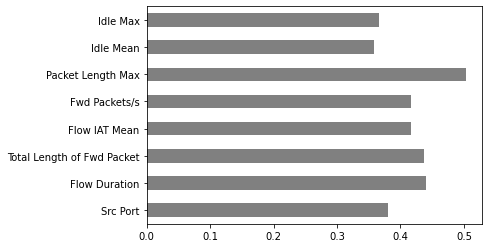

<Figure size 72000x43200 with 0 Axes>

In [267]:
# plot korelasi dari features
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color='gray')

plt.figure(figsize=(1000, 600))
plt.show()

In [227]:
print(f'df = {df.shape}')
print(f'X = {X.shape}')
print(f'y = {y.shape}')

df = (141530, 9)
X = (141530, 8)
y = (141530,)


<AxesSubplot:xlabel='Label', ylabel='count'>

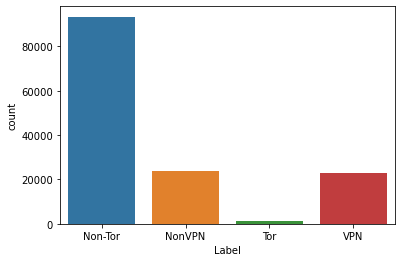

In [229]:
import seaborn as sns

sns.countplot(x=df['Label'])

In [237]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

<AxesSubplot:ylabel='count'>

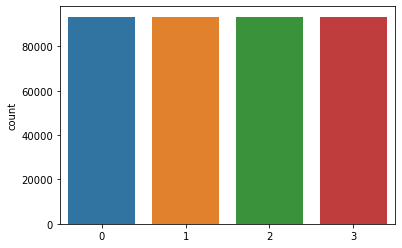

In [242]:
sns.countplot(x=y_res)

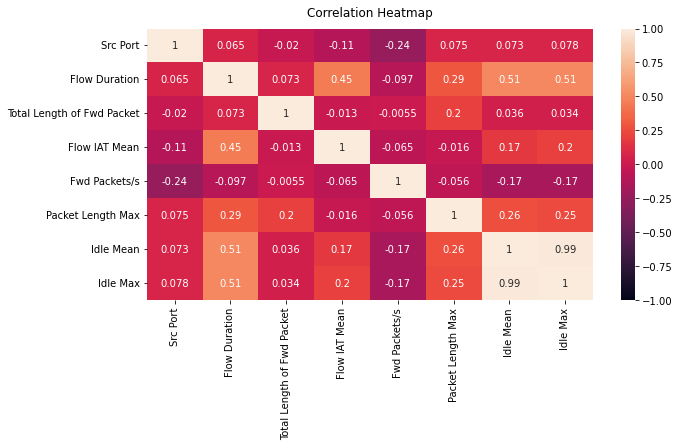

In [244]:
import seaborn as sns

plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [247]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,
                                                   y_res,
                                                   test_size=0.20,
                                                   random_state=1)

### **Mencari Best-K**

In [252]:
# mencari jumlah neighbors terbaik
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# buat list kosong untuk menampung hasil pada looping yang nantinya akan di append
mse_val = []
k = []

# lakukan looping dengan sebagai jumlah k nya
for i in range(1, 51):
    k.append(i)
    # gunakan i sebagai n_neighbors
    knn_r = KNeighborsClassifier(i)
    knn_r.fit(X_train, y_train)
    y_pred = knn_r.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    # append MSE
    mse_val.append(mse)
    print(f'n_neighbour = {str(i)} MSE = {str(mse)}')
    

n_neighbour = 1 MSE = 0.17405101425989156
n_neighbour = 2 MSE = 0.20088371158867244
n_neighbour = 3 MSE = 0.23400950659436298
n_neighbour = 4 MSE = 0.24549775724710451
n_neighbour = 5 MSE = 0.2528352413469907
n_neighbour = 6 MSE = 0.2572270201513021
n_neighbour = 7 MSE = 0.268688491664993
n_neighbour = 8 MSE = 0.2739505924884515
n_neighbour = 9 MSE = 0.2830019414875812
n_neighbour = 10 MSE = 0.2828814353618531
n_neighbour = 11 MSE = 0.29632456316529426
n_neighbour = 12 MSE = 0.2983999464417219
n_neighbour = 13 MSE = 0.3033139184575216
n_neighbour = 14 MSE = 0.30694249179888866
n_neighbour = 15 MSE = 0.314601325567383
n_neighbour = 16 MSE = 0.31626163218852515
n_neighbour = 17 MSE = 0.32390707638749416
n_neighbour = 18 MSE = 0.3249112941018946
n_neighbour = 19 MSE = 0.3318738702550713
n_neighbour = 20 MSE = 0.3313382874740577
n_neighbour = 21 MSE = 0.33704224409185246
n_neighbour = 22 MSE = 0.3394121978978376
n_neighbour = 23 MSE = 0.3427060320010712
n_neighbour = 24 MSE = 0.34529021891

Text(0.5, 1.0, 'MSE vs k')

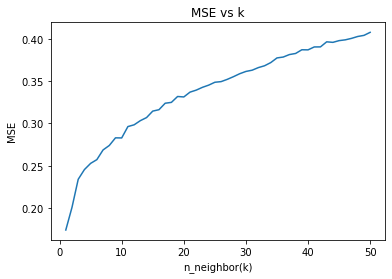

In [253]:
#plotting kedalam grafik

plt.plot(k, mse_val)
plt.xlabel('n_neighbor(k)')
plt.ylabel('MSE')
plt.title('MSE vs k')

In [248]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model_KNN = KNN(n_neighbors=1)

In [249]:
model_KNN.fit(X_train,y_train)
y_pred = model_KNN.predict(X_test)

In [250]:
from sklearn.metrics import accuracy_score

print(f'akurasi model sebelum dilakukan scaling {accuracy_score(y_test, y_pred)}')

akurasi model sebelum dilakukan scaling 0.9573006627836915


In [251]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18745
           1       0.95      0.96      0.95     18637
           2       0.97      0.97      0.97     18909
           3       0.96      0.96      0.96     18394

    accuracy                           0.96     74685
   macro avg       0.96      0.96      0.96     74685
weighted avg       0.96      0.96      0.96     74685

